<h1>Import libraries</h1>

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
#Utility functions
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns



<h1>1. Get the data</h1>

In [3]:
train_df = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv", index_col="PassengerId")
test_df = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv", index_col="PassengerId")

In [4]:
train_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


<h5>The data is already split into a train and test split</h5>

<h1>2. EDA</h1>

In [6]:
#Copy of training data for exploration
train_copy = train_df.copy()

In [7]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


<h5>Insights</h5>
<ul>
    <li>6 string/object type columns</li>
    <li>6 numeric/float type columns</li>
</ul>

<h5>Missing values</h5>

In [8]:
train_missing = missing_values_table(train_copy)
train_missing

Your selected dataframe has 13 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
CryoSleep,217,2.5
ShoppingMall,208,2.4
VIP,203,2.3
HomePlanet,201,2.3
Name,200,2.3
Cabin,199,2.3
VRDeck,188,2.2
FoodCourt,183,2.1
Spa,183,2.1
Destination,182,2.1


<Axes: >

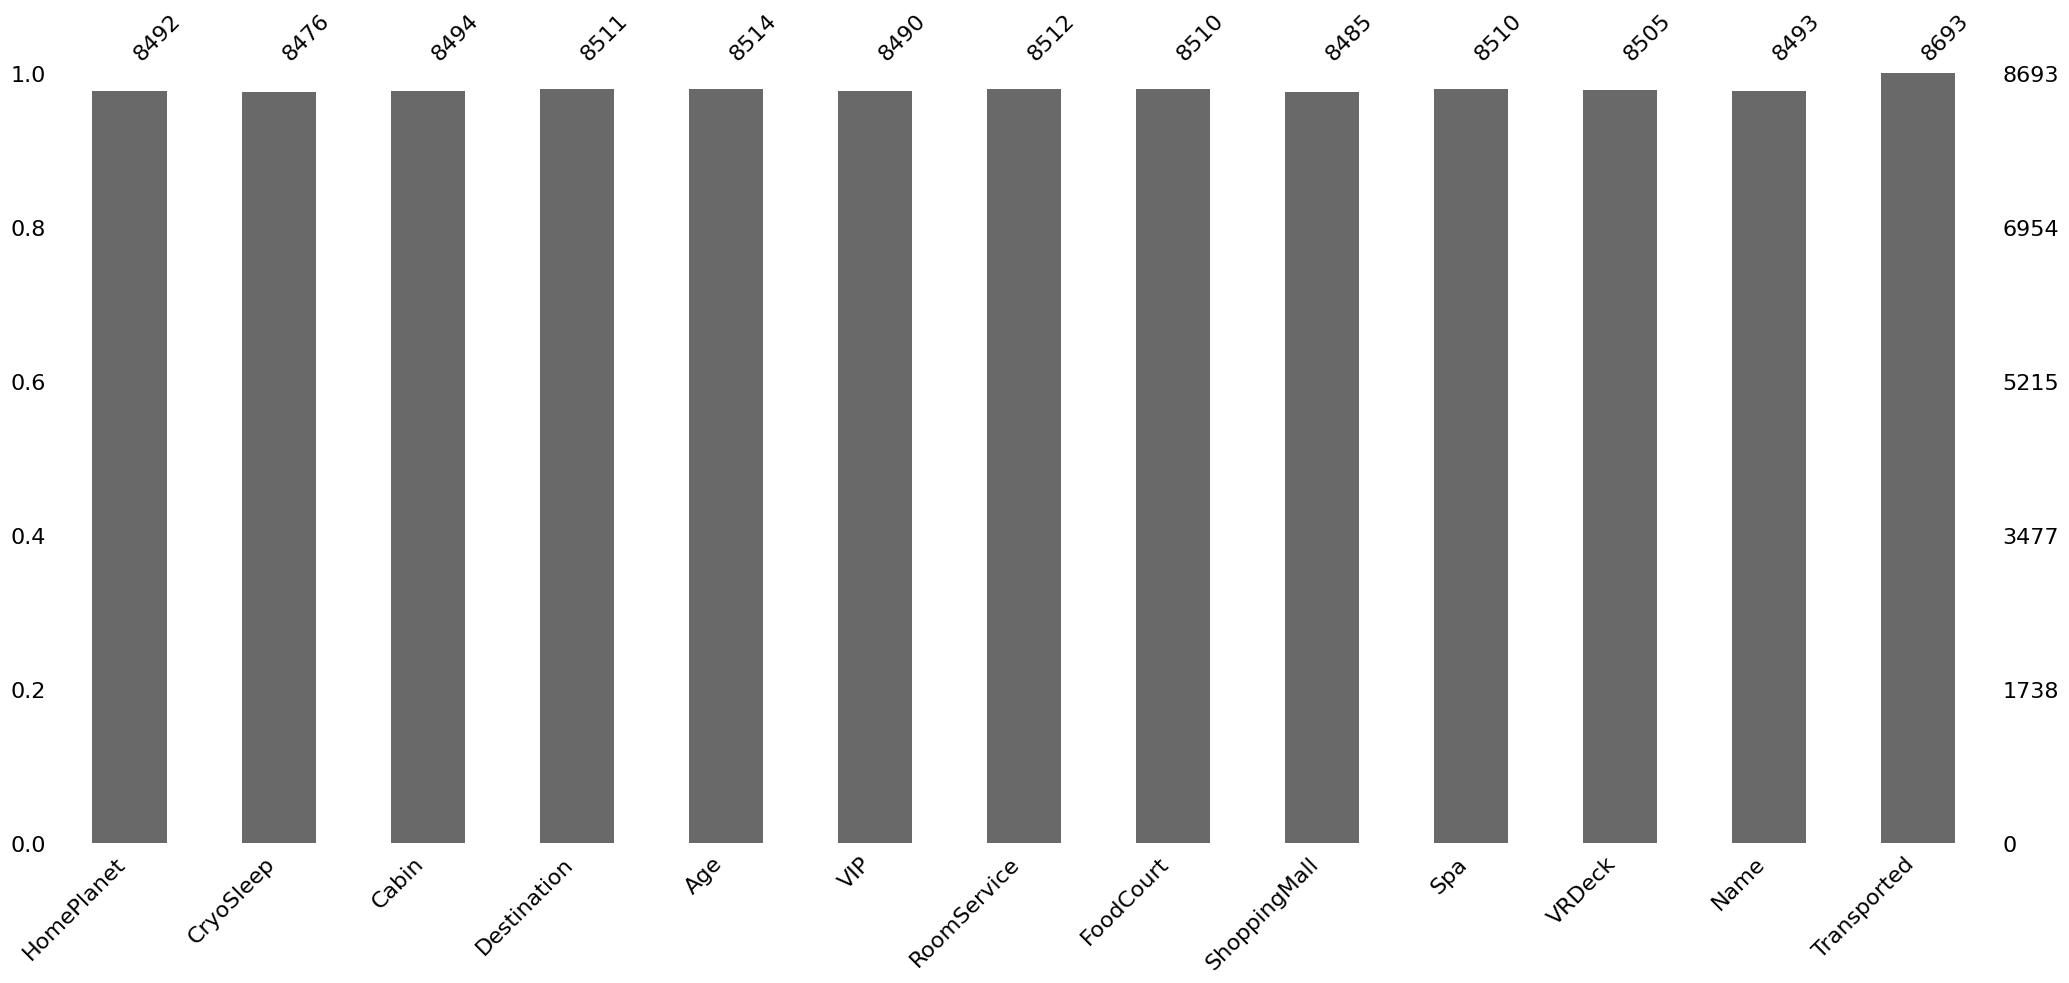

In [9]:
msno.bar(train_copy)

<h5>Insights</h5>
<ul>
    <li>Almost all features have missing values</li>
    <li>Imputation is necceccary </li>
</ul>

<h5>Numeric features</h5>

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Age', ylabel='Count'>

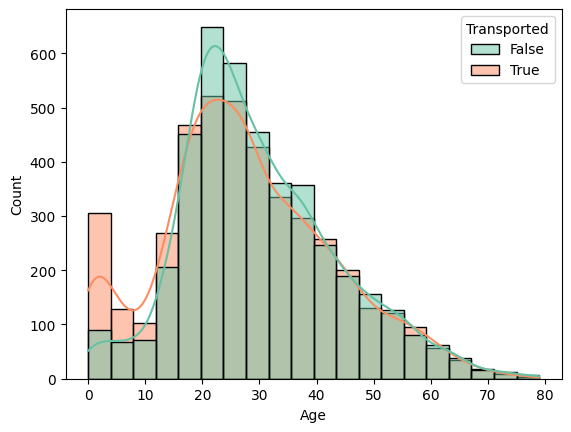

In [10]:
sns.histplot(train_df, x='Age', hue='Transported', kde=True, bins=20, palette='Set2')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='VRDeck', ylabel='Count'>

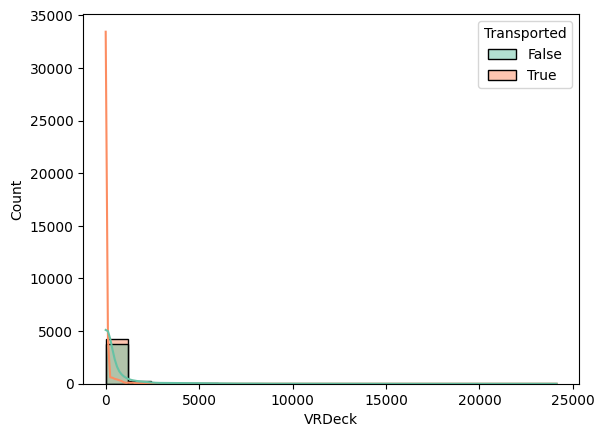

In [11]:
num_feature = 'VRDeck'
sns.histplot(train_df, x=num_feature, hue='Transported', kde=True, bins=20, palette='Set2')

<h5>Insights</h5>
<ul>
    <li>Seems like for ages before 18 have higher prob of being tranported, 20-40 have less, and 40+ are 50/50. </li>
    <li>Mostly "poor" people that were transported</li>
    <li>Age and the other attributes have very different scales</li>
    <li>Few outliers</li>
    <li>Except for age, features are exponential distrubuted</li>
    <li>Age is approximately Gaussian</li>
</ul>

<h5>Categorical features</h5>

<Axes: xlabel='VIP', ylabel='count'>

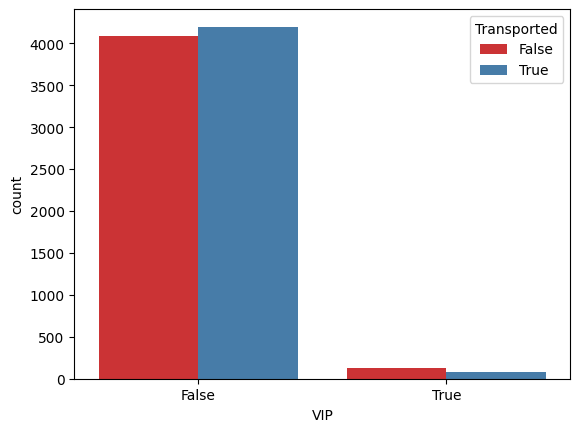

In [12]:

cat_feature = 'VIP'
sns.countplot(data=train_copy, x=cat_feature, hue='Transported', palette='Set1')

<h5>Insights</h5>
<ul>
    <li>People from earth were less likely to be transported, Europe more, and Mars 50/50</li>
    <li>Those in Cryosleep were more likely to be transported</li>
    <li>Destination, VIP and NAME not a useful feature</li>
    <li>Not explored: Cabin and Name </li>
</ul>

<h1>3. Preparing the data</h1>

<h4>Custom transformers to add extra attributes</h4>

In [13]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        return np.c_[X]

In [14]:
num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ])


In [15]:
num_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
cat_features = ['HomePlanet', 'CryoSleep', 'Cabin']

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_features),
        ("cat", cat_pipeline, cat_features),
    ])

In [16]:
# Separate the features and the target
X_train = train_df.drop(columns=['Transported'])  # All columns except the target
y_train = train_df['Transported']  # The target column

# Apply the preprocessing pipeline to X_train
X_train = preprocess_pipeline.fit_transform(X_train[num_features + cat_features])


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<h1>4. Traing the model and predictions</h1>

In [17]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=3)
forest_scores.mean()

0.7877617700072714

In [19]:

X_test = preprocess_pipeline.transform(test_df[num_features + cat_features])
y_pred = forest_clf.predict(X_test)

In [20]:
# Step 1: Create a DataFrame with 'Transported' prediction results, using the index from test_df
predictions_df = pd.DataFrame({
    'Transported': y_pred
}, index=test_df.index)  # Use the index (PassengerId) from test_df

# Step 2: Save the DataFrame to a CSV file without writing the index as a column
predictions_df.to_csv('predictions.csv')

# Optionally, print the first few rows to check
print(predictions_df.head())

             Transported
PassengerId             
0013_01             True
0018_01            False
0019_01             True
0021_01             True
0023_01            False
